In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df = pd.read_csv("C:/Users/Nantha/Documents/Glassdoor-Job-Salary-Prediction/Glassdoor_Salary_Cleaned.csv")

In [19]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,Min Salary,Max Salary,Avg Salary,Job State,Same State,Age,R,Python,AWS,Excel
0,Data Scientist / Machine Learning Expert,96-101,Posting Title\r\nData Scientist / Machine Lear...,3.9,Novartis,"Cambridge, MA","Basel, Switzerland",10000+ employees,1996,Company - Public,...,96,101,98.5,MA,0,24,0,1,0,0
1,Data Scientist,96-101,Overview\r\n\r\n\r\nData Scientist\r\n\r\nLoca...,4.0,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,...,96,101,98.5,MA,1,39,0,1,1,1
2,Data Scientist,96-101,Search by Keyword\r\nMore Options\r\n\r\nSearc...,4.1,ABIOMED,"Danvers, MA","Danvers, MA",1001 to 5000 employees,1981,Company - Public,...,96,101,98.5,MA,1,39,0,1,1,1
3,Data Scientist,96-101,New England Biolabs is seeking a Data Scientis...,4.7,New England Biolabs,"Ipswich, MA","Ipswich, MA",201 to 500 employees,1974,Company - Private,...,96,101,98.5,MA,1,46,0,1,0,1
4,Data Scientist,96-101,STR is a government research contractor specia...,4.7,Systems & Technology Research,"Woburn, MA","Woburn, MA",201 to 500 employees,2010,Company - Private,...,96,101,98.5,MA,1,10,0,1,0,1


In [6]:
def title_simplifier(title):
    if "data scientist" in title.lower():
        return "data scientist"
    elif "data engineer" in title.lower():
        return "data engineer"
    elif "machine learning" in title.lower():
        return "mle"
    elif "manager" in title.lower():
        return "manager"
    elif "director" in title.lower():
        return "director"
    else:
        return "na"
    
def seniority(title):
    if 'sr' in title.lower() or 'sr.' in title.lower() or 'senior' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'junior' in title.lower() or 'jr.' in title.lower():
        return 'junior'
    else:
        return 'na'

In [20]:
df['Job Simplified'] = df['Job Title'].apply(title_simplifier)

In [21]:
df['Job Simplified'].value_counts()

data scientist    1000
Name: Job Simplified, dtype: int64

In [22]:
df['Seniority'] = df['Job Title'].apply(seniority)

In [23]:
df['Seniority'].value_counts()

na        691
senior    300
junior      9
Name: Seniority, dtype: int64

In [24]:
df['Job State'].value_counts()

 CA    400
 NY    266
 MA    200
 WA    100
 NJ     30
 CT      4
Name: Job State, dtype: int64

In [25]:
df['Desc Length'] = df['Job Description'].apply(lambda x: len(x))

In [26]:
df['Desc Length']

0       5126
1       9845
2      10692
3       2187
4       3736
       ...  
995     4305
996     2684
997     3550
998     1077
999     3406
Name: Desc Length, Length: 1000, dtype: int64

## Competitor Count

In [27]:
df['No of Competitors'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x!='-1' else 0)

In [28]:
df['No of Competitors']

0      0
1      0
2      2
3      3
4      0
      ..
995    3
996    0
997    2
998    0
999    0
Name: No of Competitors, Length: 1000, dtype: int64

In [33]:
df.describe()

,Rating,Founded,Min Salary,Max Salary,Avg Salary,Same State,Age,R,Python,AWS,Excel,Desc Length,No of Competitors
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.0000
mean,3.291800,1553.282000,108.900000,152.340000,130.620000,0.379000,29.966000,0.001000,0.79200,0.224000,0.379000,3346.141000,0.9340
std,1.667775,817.329655,32.903079,46.839495,38.630272,0.485381,45.282197,0.031623,0.40608,0.417131,0.485381,1622.923202,1.3362
min,-1.000000,-1.000000,50.000000,99.000000,75.000000,0.000000,-1.000000,0.000000,0.00000,0.000000,0.000000,110.000000,0.0000
25%,3.300000,1853.000000,89.000000,128.000000,106.000000,0.000000,4.000000,0.000000,1.00000,0.000000,0.000000,2222.000000,0.0000
50%,3.800000,1994.000000,101.000000,143.000000,125.000000,0.000000,14.000000,0.000000,1.00000,0.000000,0.000000,3321.500000,0.0000
75%,4.200000,2008.000000,125.000000,156.000000,140.500000,1.000000,31.000000,0.000000,1.00000,0.000000,1.000000,4266.000000,3.0000
max,5.000000,2019.000000,212.000000,332.000000,272.000000,1.000000,330.000000,1.000000,1.00000,1.000000,1.000000,15121.000000,4.0000


In [34]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Min Salary', 'Max Salary', 'Avg Salary', 'Job State', 'Same State',
       'Age', 'R', 'Python', 'AWS', 'Excel', 'Job Simplified', 'Seniority',
       'Desc Length', 'No of Competitors'],
      dtype='object')

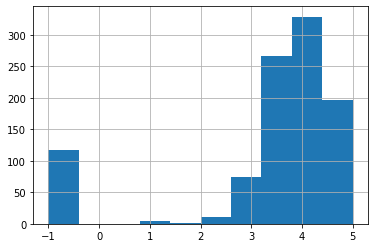

In [36]:
df['Rating'].hist()
plt.show()

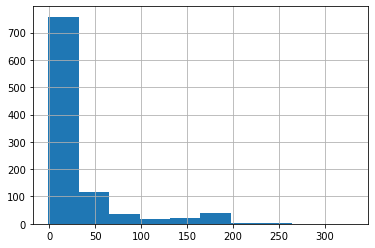

In [40]:
df['Age'].hist()
plt.show()

We must have to normalize age

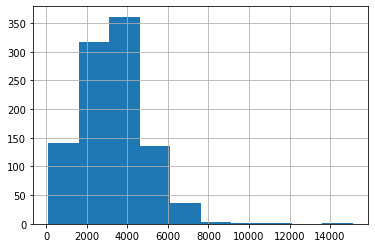

In [39]:
df['Desc Length'].hist()
plt.show()

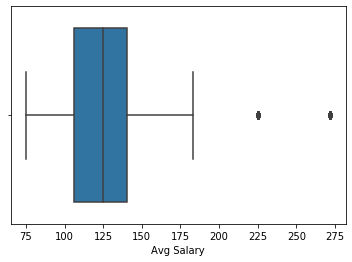

In [41]:
sns.boxplot(df['Avg Salary'])

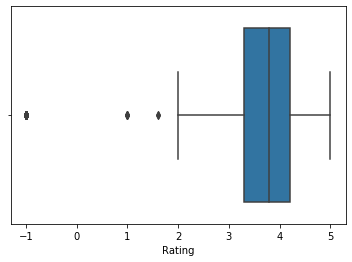

In [42]:
sns.boxplot(df['Rating'])

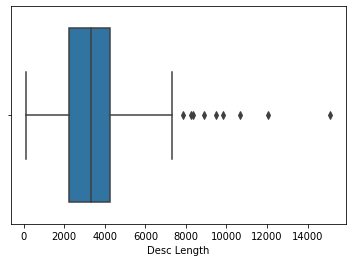

In [43]:
sns.boxplot(df['Desc Length'])

In [45]:
df[['Age','Avg Salary','Desc Length','Rating','No of Competitors']].corr()

,Age,Avg Salary,Desc Length,Rating
Age,1.000000,-0.096338,0.220696,0.180716
Avg Salary,-0.096338,1.000000,-0.057283,0.012045
Desc Length,0.220696,-0.057283,1.000000,0.147379
Rating,0.180716,0.012045,0.147379,1.000000


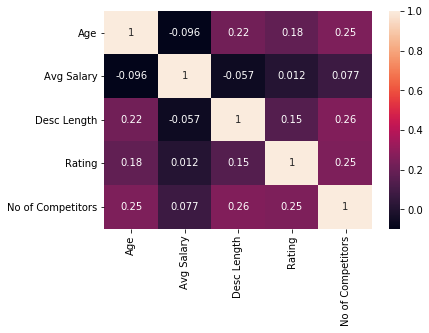

In [49]:
sns.heatmap(df[['Age','Avg Salary','Desc Length','Rating','No of Competitors']].corr(),annot=True)
plt.show()

In [51]:
df_cat = df[['Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership','Industry', 'Sector', 'Revenue','Company Name', 'Job State', 'Same State','R', 'Python', 'AWS', 'Excel','Job Simplified', 'Seniority']]

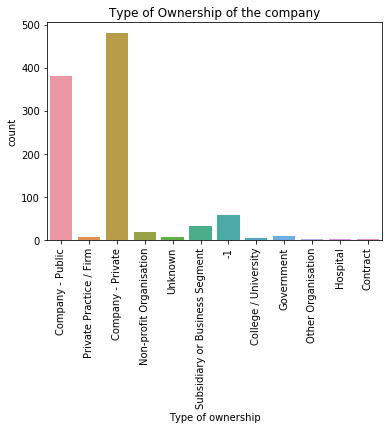

In [55]:
sns.countplot(df['Type of ownership'])
plt.title("Type of Ownership of the company")
plt.xticks(rotation=90)
plt.show()

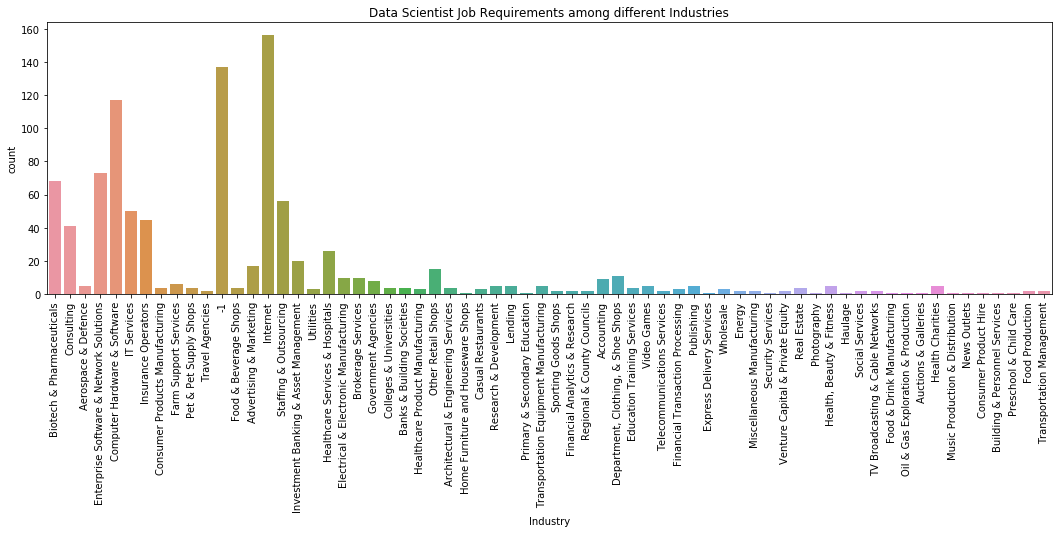

In [59]:
plt.figure(figsize=(18,5))
sns.countplot(df['Industry'])
plt.title("Data Scientist Job Requirements among different Industries")
plt.xticks(rotation=90)
plt.show()

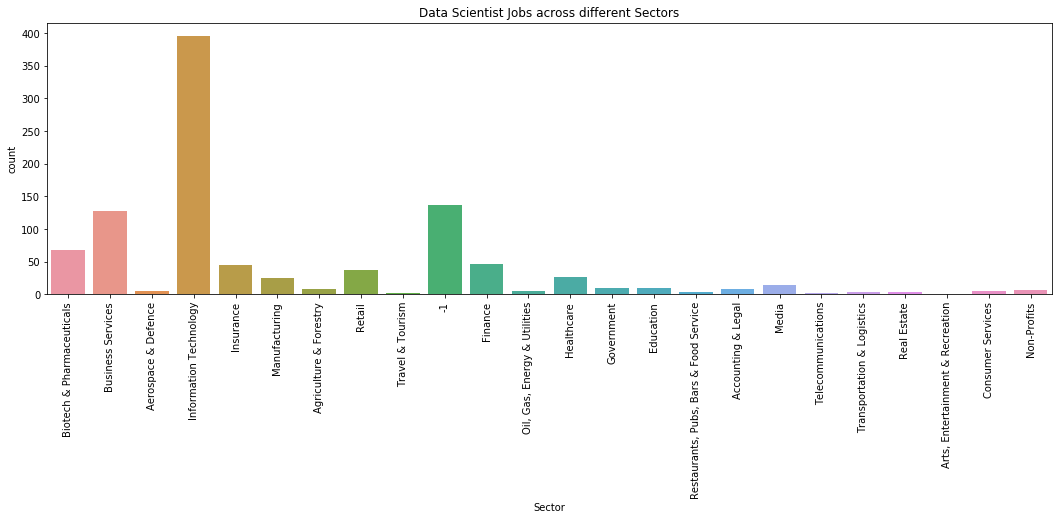

In [64]:
plt.figure(figsize=(18,5))
sns.countplot(df['Sector'])
plt.title("Data Scientist Jobs across different Sectors")
plt.xticks(rotation=90)
plt.show()

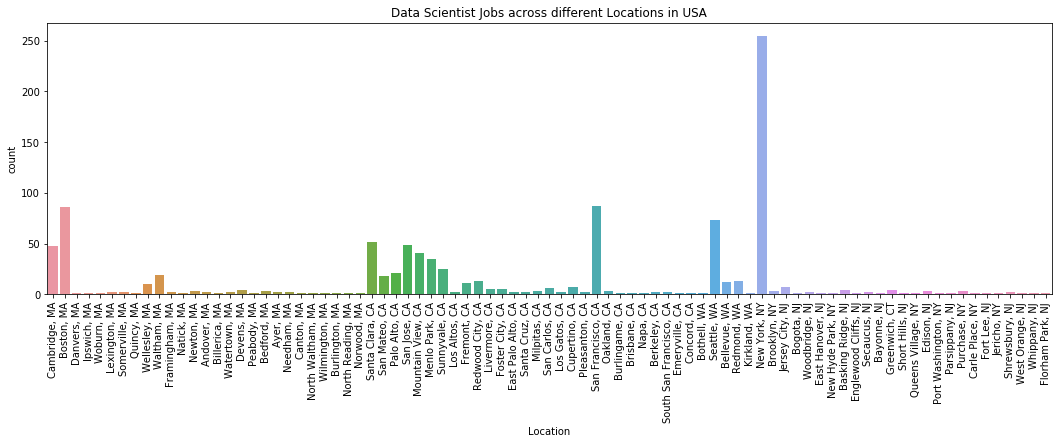

In [67]:
plt.figure(figsize=(18,5))
sns.countplot(df['Location'])
plt.title("Data Scientist Jobs across different Locations in USA")
plt.xticks(rotation=90)
plt.show()

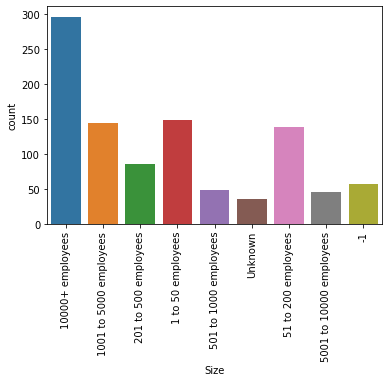

In [71]:
# plt.figure(figsize=(18,5))
sns.countplot(df['Size'])
plt.xticks(rotation=90)
plt.show()

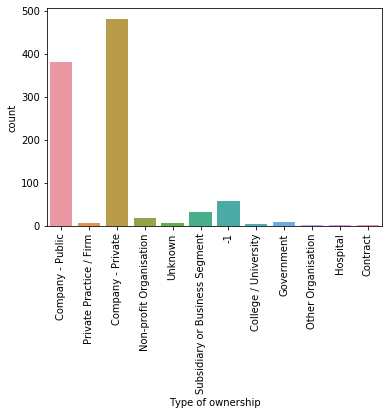

In [73]:
# plt.figure(figsize=(18,5))
sns.countplot(df['Type of ownership'])
plt.xticks(rotation=90)
plt.show()

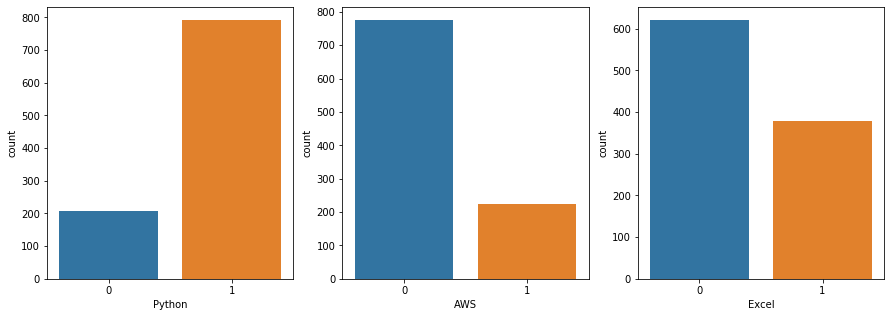

In [95]:

fig,axes = plt.subplots(1,3,figsize=(15,5))

sns.countplot(df['Python'],ax=axes[0])
sns.countplot(df['AWS'],ax=axes[1])
sns.countplot(df['Excel'],ax=axes[2])
# plt.title("Top Skills required for Data Scientist Roles")
plt.show()

In [98]:
df['Seniority'].value_counts()

na        691
senior    300
junior      9
Name: Seniority, dtype: int64

In [48]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Min Salary', 'Max Salary', 'Avg Salary', 'Job State', 'Same State',
       'Age', 'R', 'Python', 'AWS', 'Excel', 'Job Simplified', 'Seniority',
       'Desc Length', 'No of Competitors'],
      dtype='object')